In [1]:
pip install pandas xgboost scikit-learn matplotlib


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


 # Import Liabraries


In [4]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset

In [5]:
data = pd.read_csv('financial_metrics_dataset_9720_diverse.csv')

# Data Preprocessing

In [4]:
X = data[['P/E Ratio', 'P/B Ratio', 'D/E Ratio', 'ROE', 'ROA']]
y = data['Buy']


# Split the data into training and testing sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost model

In [6]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model

In [7]:

model.fit(X_train, y_train)

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [15:37:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

# Make predictions

In [8]:
y_pred = model.predict(X_test)

# Calculate accuracy

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.89


Correlation Matrix:
           P/E Ratio  P/B Ratio  D/E Ratio       ROE       ROA
P/E Ratio   1.000000   0.003868   0.005547 -0.009054 -0.010534
P/B Ratio   0.003868   1.000000   0.007731 -0.012724  0.014777
D/E Ratio   0.005547   0.007731   1.000000 -0.006476 -0.011955
ROE        -0.009054  -0.012724  -0.006476  1.000000  0.035389
ROA        -0.010534   0.014777  -0.011955  0.035389  1.000000


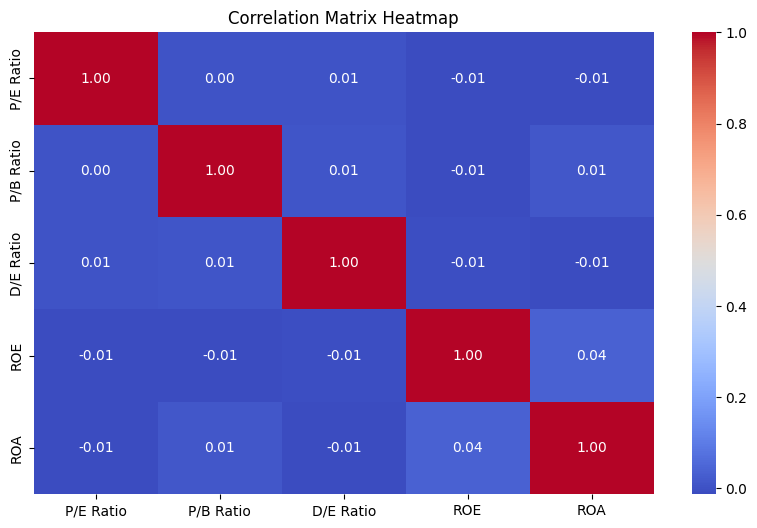

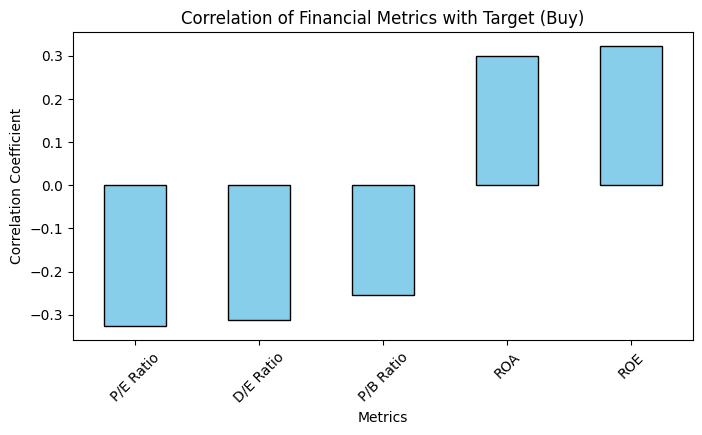

In [12]:
import seaborn as sns

columns_of_interest = ['P/E Ratio', 'P/B Ratio', 'D/E Ratio', 'ROE', 'ROA']
correlation_matrix = data[columns_of_interest].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

correlations_with_target = data[['P/E Ratio', 'P/B Ratio', 'D/E Ratio', 'ROE', 'ROA', 'Buy']].corr()['Buy'][:-1]
correlations_with_target.sort_values(inplace=True)

plt.figure(figsize=(8, 4))
correlations_with_target.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Correlation of Financial Metrics with Target (Buy)")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Metrics")
plt.xticks(rotation=45)
plt.show()


In [1]:
def calculate_confidence(user_metrics, correlation_matrix):
    confidence_score = 0
    for metric, value in user_metrics.items():
        confidence_score += value * correlation_matrix[metric][metric]
    # Normalize score (0–100)
    confidence_score = max(0, min(100, confidence_score))
    return confidence_score


# User Input Function

In [10]:
def user_input():
    print("Select Industry:")
    industry = input("Enter industry (Pharmaceuticals, Infrastructure, Real Estate, Metals and Mining, Financial Services, Banking, Energy, Information Technology, Consumer Services, Automobiles): ")

    metrics = []
    for metric in ['P/E Ratio', 'P/B Ratio', 'D/E Ratio', 'ROE', 'ROA']:
        value = float(input(f"Enter {metric}: "))
        metrics.append(value)

    return industry, metrics


# Get user input and Display prediction result


In [ ]:
industry, user_metrics = user_input()


# Convert user input to numpy array for prediction
user_data = np.array(user_metrics).reshape(1, -1)

# Predict using the model
prediction = model.predict(user_data)
probabilities = model.predict_proba(user_data)

# Display prediction result

if prediction[0] == 1:
    print("Recommendation: Buy this stock.")
    recommendation = "Buy" # Assigning value to recommendation
else:
    print("Recommendation: Do not buy this stock.")
    recommendation = "Do not Buy" # Assigning value to recommendation
reason = "Based on the financial metrics provided and the trained model's prediction."





Select Industry:



# Show probabilities for decision making

In [1]:

print(f"Probabilities: {probabilities}")

NameError: name 'probabilities' is not defined

# Plot user input values

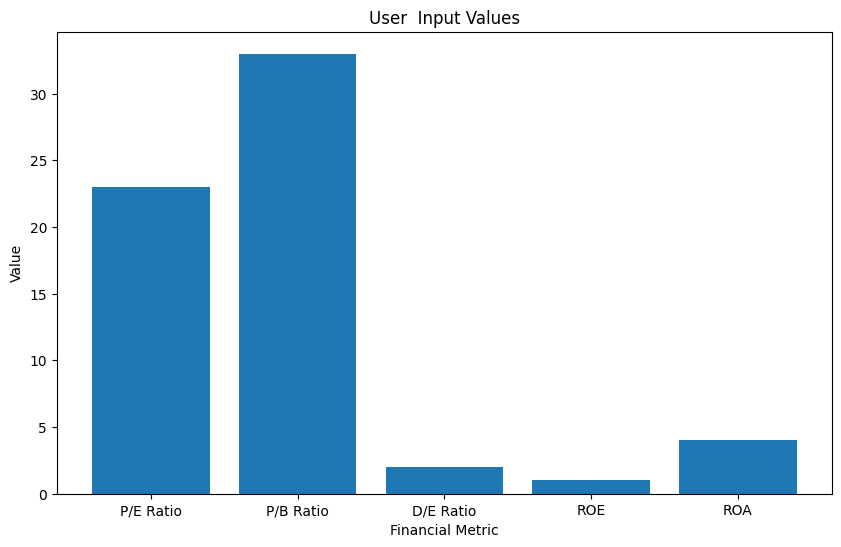

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(['P/E Ratio', 'P/B Ratio', 'D/E Ratio', 'ROE', 'ROA'], user_metrics)
plt.title('User  Input Values')
plt.xlabel('Financial Metric')
plt.ylabel('Value')
plt.show()

# Plot recommendation graph

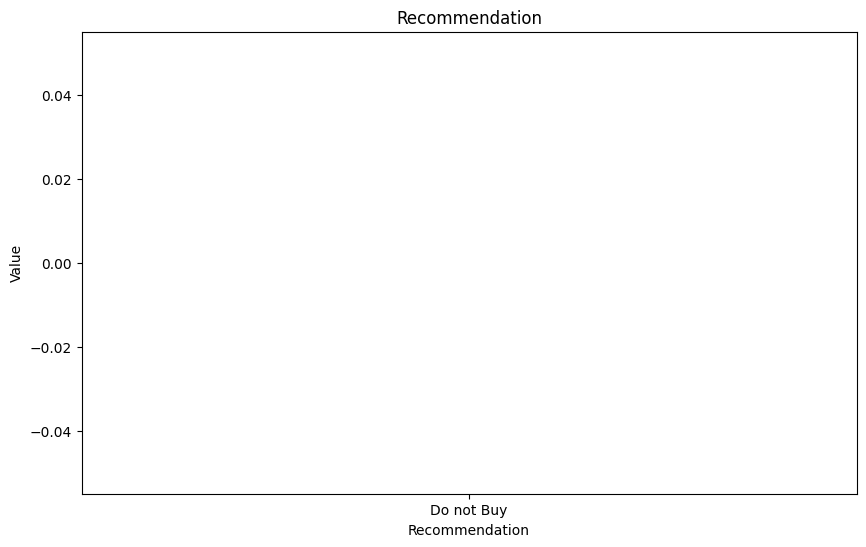

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(['Recommendation'], [1 if prediction[0] == 1 else 0])
plt.title('Recommendation')
plt.xlabel('Recommendation')
plt.ylabel('Value')
plt.xticks([0], ['Buy' if prediction[0] == 1 else 'Do not Buy'])
plt.show()


# Show probabilities for decision making

In [ ]:
print(f"Probabilities: {probabilities}")
print(f"Recommendation: {recommendation}") # Now recommendation has a value
print(f"Reason: {reason}") # Now reason has a value

Probabilities: [[9.9993092e-01 6.9109185e-05]]
Recommendation: Do not Buy
Reason: Based on the financial metrics provided and the trained model's prediction.


In [ ]:
import pickle

# Save the model to a file
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)
